In [3]:
using DataFrames, PyPlot, LowRankModels, StatsBase
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [4]:
dataframe = readtable("TrainingWithk=12.csv")
XGLRM = convert(Array{Float64,2},dataframe[:,1:30])
yGLRM = dataframe[:,31].data;

In [5]:
beforeScaling = XGLRM[:,14:30]

1440×17 Array{Float64,2}:
  9.0  0.106  78.8  1348.0  203.3  175.0  …  0.116      0.0         0.0      
  9.0  0.106  78.8  1348.0  203.3  175.0     0.116      0.0         0.0      
  8.0  0.071  82.7  1541.7  211.8  128.0     0.0787097  0.0         0.0      
  6.0  0.071  82.7  1541.7  211.8  128.0     0.0956667  0.0         0.0      
  5.0  0.071  82.7  1541.7  211.8  128.0     0.146774   0.0         0.0      
  3.0  0.097  77.2  1476.9  219.1  185.0  …  0.0522581  0.290323    0.483871 
  5.0  0.097  77.2  1476.9  219.1  185.0     0.156129   0.0         0.0      
 10.0  0.106  78.8  1348.0  203.3  175.0     0.161613   0.0         0.0      
  2.0  0.097  77.2  1476.9  219.1  185.0     0.03       0.3         0.821429 
  9.0  0.062  87.5  1608.9  228.1  154.0     0.199      0.0         0.0      
 12.0  0.062  87.5  1608.9  228.1  154.0  …  0.0693548  0.0         0.0      
  4.0  0.061  95.0  1583.6  223.1  140.0     0.301667   0.0         0.0      
 11.0  0.071  82.7  1541.7  211.8  128

In [6]:
size(beforeScaling)

(1440,17)

In [15]:
afterScaling= zeros(size(beforeScaling))
means = zeros(size(beforeScaling)[2])
sds = zeros(size(beforeScaling)[2])
for i = 1: 17
    x = beforeScaling[:,i]
    means[i] = mean(x)
    sds[i] = std(x)
    afterScaling[:,i] = (x .- mean(x))/std(x)
end

In [12]:
XGLRM = hcat(XGLRM[:,1:13],afterScaling)

1440×30 Array{Float64,2}:
 1.0  0.907563   0.0633568  0.546572  …  -0.18016    -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572     -0.18016    -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572     -0.609139   -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572     -0.41407    -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572      0.173858   -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572  …  -0.913431    0.814604    0.242194
 1.0  0.907563   0.0633568  0.546572      0.281474   -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572      0.344559   -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572     -1.16948     0.852331    0.588139
 1.0  0.907563   0.0633568  0.546572      0.77465    -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572  …  -0.716754   -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572      1.9557     -0.3172     -0.2537  
 1.0  0.907563   0.0633568  0.546572      0.0269069  -0.187252   -0.2537  

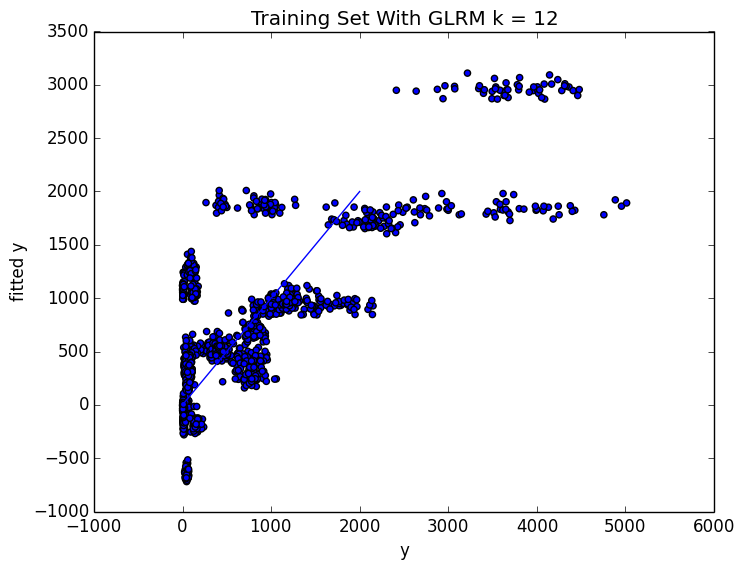

mean((yGLRM - yfitGLRM) .^ 2) = 436983.4587604607


PyObject <matplotlib.text.Text object at 0x31a6a0410>

  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/rainyniu/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/rainyniu/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /User

In [13]:
wGLRM = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,XGLRM, yGLRM; stepsize=0.1, maxiters = 500000)
yfitGLRM = XGLRM * wGLRM
@show mean((yGLRM - yfitGLRM).^2)
PyPlot.scatter(yGLRM,yfitGLRM)
PyPlot.plot(1:2000,1:2000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Training Set With GLRM k = 12")

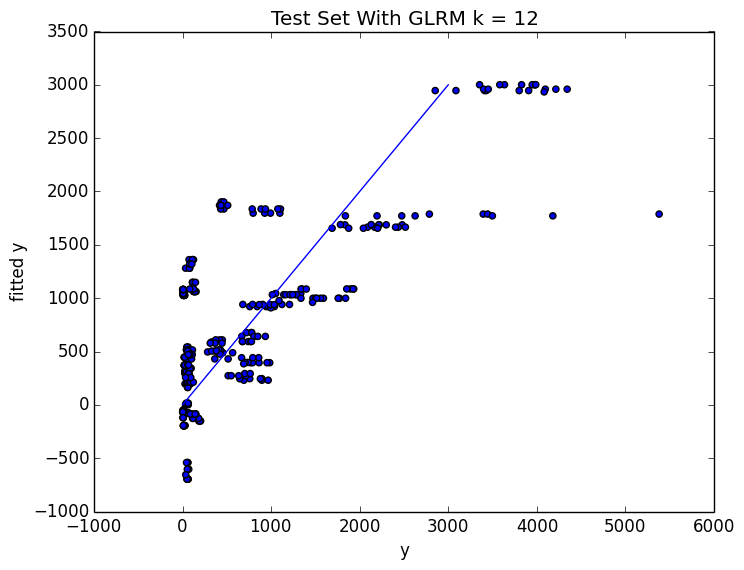

mean((ytestGLRM - yfittestGLRM) .^ 2) = 412717.5185079983


PyObject <matplotlib.text.Text object at 0x31af83650>

In [21]:
testdataframe = readtable("TestingWithk=12.csv")
XtestGLRM = convert(Array{Float64,2},testdataframe[:,1:30])
Xtestafterscaling = zeros(size(XtestGLRM[:,14:30]))
for i = 1:17
    x = XtestGLRM[:,(i+13)]
    Xtestafterscaling[:,i] = (x.-means[i])/sds[i]
end
XtestGLRM = hcat(XtestGLRM[:,1:13],Xtestafterscaling)
ytestGLRM = testdataframe[:,31].data;
yfittestGLRM = XtestGLRM*wGLRM
@show mean((ytestGLRM - yfittestGLRM).^2)
PyPlot.scatter(ytestGLRM,yfittestGLRM)
PyPlot.plot(1:3000,1:3000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Test Set With GLRM k = 12")